In [1]:
import numpy as np
import random
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import math
import scipy.stats as st
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt 
import numpy as np 
import copy
n=5
nn=5
divide_number=1000;
object_number=1.0
batch_size=128
width=0.001
width1=0.001

In [2]:
def distribution1(i):
    x=0;
    #x=np.random.uniform(0, 1, size=1);
    #R=np.random.randint(2);
    if (i==0):
        x=np.random.uniform(0, 1, size=1);
    elif(i==1):
        x=np.random.uniform(0, 1, size=1);
    elif(i==2):
        x=np.random.uniform(0, 1, size=1);
    elif(i==3):
        x=np.random.uniform(0, 1, size=1);
    else:
        x=np.random.uniform(0, 1, size=1);
    if(x<=0):
        x=0;
    return x;

def distribution():
    list_temp=np.random.rand(nn);
    for ii in range(len(list_temp)):
        list_temp[ii]=distribution1(ii)
    list_temp=np.array(list_temp)
    #list_temp=sorted(list_temp,reverse=1);
    return list_temp;
print(distribution())

[0.21790509 0.90669572 0.57511477 0.52527043 0.32282509]


In [3]:
possible = np.zeros((n,divide_number+1), dtype=np.double)
for j in range(0,n):
    for i in range(100000):#100000
        x=distribution1(j%5)*divide_number
        temp=int(x)
        #print(o,temp)
        if(temp>divide_number):
            temp=divide_number
        possible[j][temp]+=1/100000;

In [4]:
P = np.zeros((n,divide_number+1), dtype=np.double)
for j in range(0,n):
    P[j][0]=possible[j][0]
    for i in range(1,divide_number+1):
        P[j][i]=P[j][i-1]+possible[j][i];
print(P)

[[1.0700e-03 2.2000e-03 3.2400e-03 ... 9.9899e-01 1.0000e+00 1.0000e+00]
 [1.0300e-03 1.9200e-03 3.1100e-03 ... 9.9903e-01 1.0000e+00 1.0000e+00]
 [8.8000e-04 1.9400e-03 2.9400e-03 ... 9.9907e-01 1.0000e+00 1.0000e+00]
 [9.3000e-04 1.8900e-03 2.7100e-03 ... 9.9892e-01 1.0000e+00 1.0000e+00]
 [1.0800e-03 2.0400e-03 3.0300e-03 ... 9.9904e-01 1.0000e+00 1.0000e+00]]


In [5]:
dp = np.zeros(((nn+2), (nn+2), divide_number+1), dtype=np.double)
record_dp = np.zeros(((nn+2), (nn+2), divide_number+1), dtype=np.double)
for yes in range(0,nn+1):
    for i in range(0,divide_number+1):
        dp[1][yes][i]=(1.0-P[nn-1][i])*(0.0)+P[nn-1][i]*(yes+1.0);
        record_dp[1][yes][i]=i;

In [6]:
for i in range(2,nn+1):
    for yes in range(0,nn+1):
        for j in range(divide_number+1):
            min_num=99999;
            for o in range(0,j+1):
                if( min_num>(1.0-P[nn-i][o])*dp[i-1][yes+1][j-o]+P[nn-i][o]*(dp[i-1][yes][j]+1)):
                    record_dp[i][yes][j]=o;
                    min_num=(1.0-P[nn-i][o])*dp[i-1][yes+1][j-o]+P[nn-i][o]*(dp[i-1][yes][j]+1)
                #min_num=min(min_num,(1.0-P[o])*dp[i-1][yes+1][j-o]+
                #            P[o]*(dp[i-1][yes][j]+1));
                
                #print(i,yes,j,o,(divide_number-o)/divide_number*dp[i-1][yes+1][j-o]+
                #            (o)/divide_number*(dp[i-1][yes][j]+1));
            dp[i][yes][j]=min_num;
        dp[i][yes][0]=0;
        record_dp[i][yes][0]=0

In [7]:
print(dp[nn][0][divide_number]);
print(record_dp[nn][0][divide_number]);
print(temp)


1.6237620407294613
340.0
509


In [8]:
def plan_dp(temp):
    #print(temp)
    remain=divide_number
    yes=0;
    ans =0;
    o_list=[];
    remain_list=[];
    for i in range(nn,0,-1):
        o=record_dp[i][yes][remain]
        #print(o,remain)
        o_list.append(o)
        remain_list.append(remain);
        if(o<temp[nn-i]):
            remain-=int(o);
            
            yes+=1;
        elif (remain>0):
            ans+=1;
    if(remain<=0):
        return ans,o_list;
    else:
        return nn,o_list;
    

In [9]:
ans_list=[];
for i in range(10000):
    temp=distribution()*divide_number   
    ans_list.append(plan_dp(temp)[0]);
    #print(plan_dp(temp)[0])
print(sum(ans_list)/len(ans_list))

1.642


In [10]:
#Cost Sharing
def cost_sharing(test):
    kk=100;
    total_delay1=0;
    for k in range(nn,0,-1):
        count=0;
        delay=0;
        for item in test:
            if(item>=1.0/k):
                count+=1;
            else:
                delay+=1;
        if(count>=k):
            total_delay1+=delay;
            break;
        if(k<=1):
            #print(test);
            total_delay1+=nn;
    return total_delay1;

def cost_sharing_label(test):
    kk=100;
    total_delay1=0;
    temp=[]
    for item in test:
        if(item!=-1):
            temp.append(item);
    for k in range(nn,0,-1):
        count=0;
        delay=0;
        for item in test:
            if(item>=1.0/k):
                count+=1;
            else:
                delay+=1;
        if(count>=k-1):
            return 1.0/k
            break;


total_delay_cost=0;
total_welfare=0
test_number_cost=10000
for i in range(test_number_cost):
    test=distribution();
    kk=100;
    for k in range(nn,0,-1):
        count=0;
        delay=0;
        welfare=0;
        for item in test:
            if(item>=1.0/k):
                count+=1;
                welfare+=item-1.0/k
            else:
                delay+=1;
        if(count>=k):
            total_delay_cost+=delay;
            total_welfare+=welfare;
            break;
        if(k<=1):
            #print(test);
            total_delay_cost+=nn;
            total_welfare+=0
            

print(total_delay_cost/test_number_cost);
print(total_welfare/test_number_cost);   

1.4373
1.3339727508083785


In [11]:
#print(trainingdata)

import tensorflow as tf
#导入TensorFlow工具包并简称为tf
 
from numpy.random import RandomState
#导入numpy工具包，生成模拟数据集
keep_prob=1
tensor_number=200
w1 = tf.Variable(tf.truncated_normal([n,tensor_number],stddev=0.1))
w2 = tf.Variable(tf.truncated_normal([tensor_number,tensor_number],stddev=0.1))
w3 = tf.Variable(tf.truncated_normal([tensor_number,tensor_number],stddev=0.1))
w4 = tf.Variable(tf.truncated_normal([tensor_number,tensor_number],stddev=0.1))
w5 = tf.Variable(tf.truncated_normal([tensor_number,tensor_number],stddev=0.1))
w6 = tf.Variable(tf.truncated_normal([tensor_number,n],stddev=0.1))


biases1 = tf.Variable(tf.zeros([1,tensor_number])+0.01)
biases2 = tf.Variable(tf.zeros([1,tensor_number])+0.01)
biases3 = tf.Variable(tf.zeros([1,tensor_number])+0.01)
biases4 = tf.Variable(tf.zeros([1,tensor_number])+0.01)
biases5 = tf.Variable(tf.zeros([1,tensor_number])+0.01)
biases6 = tf.Variable(tf.zeros([1,n])+0.01)




lr1 = tf.Variable(0.00000001,dtype=tf.float32)
lr2 = tf.Variable(0.0000001,dtype=tf.float32)
#分别定义一二层和二三层之间的网络参数，标准差为1，随机产生的数保持一致

with tf.name_scope('input'):
    x = tf.placeholder(tf.float32,shape=(None,n),name='x-input1')
    xx = tf.placeholder(tf.float32,shape=(None,n),name='x-input2')
    y = tf.placeholder(tf.float32,shape=(None,n),name='y-input1')

    

#定义神经网络前向传播过程


Instructions for updating:
Colocations handled automatically by placer.


In [12]:
#输入为两个维度，即两个特征，输出为一个标签,声明数据类型float32，None即一个batch大小
#y_是真实的标签

xor0=tf.sigmoid((1e3-x) / 0.00001)

x1_1 = tf.nn.dropout(tf.nn.relu(tf.matmul(xor0,w1))+biases1,keep_prob)
x1_2 = tf.nn.dropout(tf.nn.relu(tf.matmul(x1_1,w2))+biases2,keep_prob)
x1_3 = tf.nn.dropout(tf.nn.relu(tf.matmul(x1_2,w3))+biases3,keep_prob)
x1_4 = tf.nn.dropout(tf.nn.relu(tf.matmul(x1_3,w4))+biases4,keep_prob)
x1_5 = tf.nn.dropout(tf.nn.relu(tf.matmul(x1_4,w5))+biases5,keep_prob)
#y1_1  = tf.nn.l2_normalize(tf.nn.dropout(tf.nn.relu(tf.matmul(x1_5,w61)+biases61),keep_prob))
y1_1 = tf.nn.softmax((tf.nn.relu(tf.matmul(x1_5,w6))+biases6))
xor1 = tf.sigmoid((x+0.001-y1_1) / width)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [13]:
x2_1 = tf.nn.dropout(tf.nn.relu(tf.matmul(xor1,w1))+biases1,keep_prob)
x2_2 = tf.nn.dropout(tf.nn.relu(tf.matmul(x2_1,w2))+biases2,keep_prob)
x2_3 = tf.nn.dropout(tf.nn.relu(tf.matmul(x2_2,w3))+biases3,keep_prob)
x2_4 = tf.nn.dropout(tf.nn.relu(tf.matmul(x2_3,w4))+biases4,keep_prob)
x2_5 = tf.nn.dropout(tf.nn.relu(tf.matmul(x2_4,w5))+biases5,keep_prob)
#y1_1  = tf.nn.l2_normalize(tf.nn.dropout(tf.nn.relu(tf.matmul(x1_5,w61)+biases61),keep_prob))
y2_1 = tf.nn.softmax((tf.nn.relu(tf.matmul(x2_5,w6))+biases6)-(1.0-xor1)*1000)
xor2 = tf.sigmoid((x+0.001-y2_1) / width) * xor1

In [14]:
x3_1 = tf.nn.dropout(tf.nn.relu(tf.matmul(xor2,w1))+biases1,keep_prob)
x3_2 = tf.nn.dropout(tf.nn.relu(tf.matmul(x3_1,w2))+biases2,keep_prob)
x3_3 = tf.nn.dropout(tf.nn.relu(tf.matmul(x3_2,w3))+biases3,keep_prob)
x3_4 = tf.nn.dropout(tf.nn.relu(tf.matmul(x3_3,w4))+biases4,keep_prob)
x3_5 = tf.nn.dropout(tf.nn.relu(tf.matmul(x3_4,w5))+biases5,keep_prob)
#y1_1  = tf.nn.l2_normalize(tf.nn.dropout(tf.nn.relu(tf.matmul(x1_5,w61)+biases61),keep_prob))
y3_1 = tf.nn.softmax((tf.nn.relu(tf.matmul(x3_5,w6))+biases6)-(1.0-xor2)*1000)
xor3 = tf.sigmoid((x+0.001-y3_1) / width) * xor2

In [15]:
x4_1 = tf.nn.dropout(tf.nn.relu(tf.matmul(xor3,w1))+biases1,keep_prob)
x4_2 = tf.nn.dropout(tf.nn.relu(tf.matmul(x4_1,w2))+biases2,keep_prob)
x4_3 = tf.nn.dropout(tf.nn.relu(tf.matmul(x4_2,w3))+biases3,keep_prob)
x4_4 = tf.nn.dropout(tf.nn.relu(tf.matmul(x4_3,w4))+biases4,keep_prob)
x4_5 = tf.nn.dropout(tf.nn.relu(tf.matmul(x4_4,w5))+biases5,keep_prob)
#y1_1  = tf.nn.l2_normalize(tf.nn.dropout(tf.nn.relu(tf.matmul(x1_5,w61)+biases61),keep_prob))
y4_1 = tf.nn.softmax((tf.nn.relu(tf.matmul(x4_5,w6))+biases6)-(1.0-xor3)*1000)
xor4 = tf.sigmoid((x+0.001-y4_1) / width) * xor3

In [16]:
x5_1 = tf.nn.dropout(tf.nn.relu(tf.matmul(xor4,w1))+biases1,keep_prob)
x5_2 = tf.nn.dropout(tf.nn.relu(tf.matmul(x5_1,w2))+biases2,keep_prob)
x5_3 = tf.nn.dropout(tf.nn.relu(tf.matmul(x5_2,w3))+biases3,keep_prob)
x5_4 = tf.nn.dropout(tf.nn.relu(tf.matmul(x5_3,w4))+biases4,keep_prob)
x5_5 = tf.nn.dropout(tf.nn.relu(tf.matmul(x5_4,w5))+biases5,keep_prob)
#y1_1  = tf.nn.l2_normalize(tf.nn.dropout(tf.nn.relu(tf.matmul(x1_5,w61)+biases61),keep_prob))
y5_1 = tf.nn.softmax((tf.nn.relu(tf.matmul(x5_5,w6))+biases6)-(1.0-xor4)*1000)
xor5 = tf.sigmoid((x+0.001-y5_1) / width) * xor4

In [17]:


x0_1 = tf.nn.dropout(tf.nn.relu(tf.matmul(xx,w1))+biases1,keep_prob)
x0_2 = tf.nn.dropout(tf.nn.relu(tf.matmul(x0_1,w2))+biases2,keep_prob)
x0_3 = tf.nn.dropout(tf.nn.relu(tf.matmul(x0_2,w3))+biases3,keep_prob)
x0_4 = tf.nn.dropout(tf.nn.relu(tf.matmul(x0_3,w4))+biases4,keep_prob)
x0_5 = tf.nn.dropout(tf.nn.relu(tf.matmul(x0_4,w5))+biases5,keep_prob)
#y1_1  = tf.nn.l2_normalize(tf.nn.dropout(tf.nn.relu(tf.matmul(x1_5,w61)+biases61),keep_prob))
y0_1 = tf.nn.softmax((tf.nn.relu(tf.matmul(x0_5,w6))+biases6))


In [18]:
offer= y5_1 * xor5

In [19]:
possible=1.0-offer
delay = tf.reduce_sum(offer,reduction_indices=1)

In [20]:

output_payment = tf.reduce_sum(offer,reduction_indices=1)
delta = tf.sigmoid((output_payment+0.001-1.0) / width1)
tf_delay = delta * tf.reduce_sum((1.0-xor5),reduction_indices=1) + (1.0 - delta) * n;
tf_welfare = delta * tf.reduce_sum((xor5*(x-y5_1)),reduction_indices=1);

In [21]:
#定义损失函数和反向传播算法
loss_welfare = 1.0*(tf.reduce_sum(nn-tf_welfare))
loss_delay = 1.0*(tf.reduce_sum(tf_delay))
#loss= tf.reduce_sum(x5_1)
loss_dp= 1.0*(tf.reduce_sum(tf.square(y0_1-y)))
loss=loss_welfare
train_step1=tf.train.AdamOptimizer(lr1).minimize(loss)
train_step2=tf.train.GradientDescentOptimizer(lr2).minimize(loss)
train_step3=tf.train.AdadeltaOptimizer(lr1).minimize(loss)
train_step4=tf.train.AdamOptimizer(lr1).minimize(loss_dp)
#train_step4=tf.train.AdagradDAOptimizer(lr2).minimize(loss)
print(loss)

Instructions for updating:
Use tf.cast instead.
Tensor("mul_13:0", shape=(), dtype=float32)


In [22]:
saver = tf.train.Saver()
#创建会话来运行TensorFlow程序
sess = tf.Session()

init_op = tf.global_variables_initializer()
sess.run(init_op)
writer=tf.summary.FileWriter('logs/',sess.graph)

In [23]:

def run_appen(list_x):
    x1=list_x[0];
    x2=list_x[1];
    x3=list_x[2];
    x4=list_x[3];
    x5=list_x[4];
    ans,S=plan_dp([x1*divide_number,x2*divide_number,x3*divide_number,
                  x4*divide_number,x5*divide_number]);
    #print(S[0]/divide_number)
    SS=copy.deepcopy(S);
    if(x1>=S[0]/divide_number):
        SS[0]=1;
    else:
        SS[0]=0;
    if(x2>=S[1]/divide_number):
        SS[1]=1;
    else:
        SS[1]=0;
    if(x3>=S[2]/divide_number):
        SS[2]=1;
    else:
        SS[2]=0;
    if(x4>=S[3]/divide_number):
        SS[3]=1;
    else:
        SS[3]=0;
    if(x5>=S[4]/divide_number):
        SS[4]=1;
    else:
        SS[4]=0;
    trainingdata1.append(SS)
    trainingdata.append(list_x)
    #traininglabel1.append([cost_sharing_label(test)])
    traininglabel.append([S[0]/divide_number,
                          S[1]/divide_number,S[2]/divide_number,S[3]/divide_number,S[4]/divide_number])
def readdata():
    for i in range(50000):#50000):
        list_x=distribution();
        newX.append(list_x)
    for i in range(len(newX)):
        run_appen(newX[i]);
        
                            
newX=[];
trainingdata1=[];
trainingdata=[];
traininglabel=[];
def produce_training_data():
    newX=[];
    trainingdata=[];
    S=1.0
    readdata();

produce_training_data();
np.set_printoptions(precision=4, suppress=True)

In [24]:

dataset_size=len(trainingdata)
j1=1
j2=2
print(trainingdata[j1:j2])
print(sess.run(loss_delay,feed_dict={
    x:trainingdata[j1:j2]
}
              )
     )
print(sess.run(x,feed_dict={
    x:trainingdata[j1:j2]
}
              )
     )
print(sess.run(xor2,feed_dict={
    x:trainingdata[j1:j2]
}
              )
     )
print(sess.run(offer,feed_dict={
    x:trainingdata[j1:j2]
}
              )
     )


[array([0.3116, 0.9434, 0.6471, 0.8166, 0.9776])]
1.3446611
[[0.3116 0.9434 0.6471 0.8166 0.9776]]
[[1. 1. 1. 1. 1.]]
[[0.2102 0.1974 0.1974 0.1974 0.1974]]


In [25]:
print(sess.run(y1_1,feed_dict={
    x:trainingdata[j1:j2]
}
              )
     )

print(sess.run(y2_1,feed_dict={
    x:trainingdata[j1:j2]
}
              )
     )
print(sess.run(y3_1,feed_dict={
    x:trainingdata[j1:j2]
}
              )
     )


print(sess.run(xor1,feed_dict={
    x:trainingdata[j1:j2]
}
              )
     )

print(sess.run(xor2,feed_dict={
    x:trainingdata[j1:j2]
}
              )
     )
print(sess.run(offer,feed_dict={
    x:trainingdata[j1:j2]
}
              )
     )

[[0.2102 0.1974 0.1974 0.1974 0.1974]]
[[0.2102 0.1974 0.1974 0.1974 0.1974]]
[[0.2102 0.1974 0.1974 0.1974 0.1974]]
[[1. 1. 1. 1. 1.]]
[[1. 1. 1. 1. 1.]]
[[0.2102 0.1974 0.1974 0.1974 0.1974]]


In [26]:
#save_path = saver.restore(sess, "Tensorflow-new-5-difference1/1.ckpt")
STEPS = 20001
#设置训练的轮数
flag=0;
training=1;
for i in range(STEPS):

    	#通过选取的样本训练神经网络并更新参数
    if i%1000 == 0:
        sess.run(tf.assign(lr1,0.0000001*(0.99**(i/1000))))
        sess.run(tf.assign(lr2,0.000001*(0.99**(i/1000))))
        loss_value=0;
        if i%1000 == 0:
            ii=10;
            j1=(ii-1)*batch_size
            j2=ii*batch_size
            loss_value += sess.run(tf.reduce_sum(tf_welfare),feed_dict={x:trainingdata[j1:j2]})
            print("After %d training step(s),loss on data is %g" % (i,loss_value/(j2-j1)))
    if i%10000 == -100:
        if((i/100)%3==0):
            flag=0
        elif((i/100)%3==1):
            flag=1
        else:
            flag=1#flag=2

    randomi = random.randint(0,200000);
    start = (randomi) % dataset_size
    end = min(start+batch_size,dataset_size)
    if(flag==0):
        sess.run(train_step4,feed_dict={x:trainingdata[j1:j2],xx:trainingdata1[j1:j2],y:traininglabel[j1:j2]})                                                                                                                
        #sess.run(train_step1,feed_dict={x:trainingdata[j1:j2]})
    elif(flag==1):
        sess.run(train_step2,feed_dict={
                x:trainingdata[j1:j2]
        })
    else:
        sess.run(train_step3,feed_dict={
                x:trainingdata[j1:j2]
        })

    

save_path = saver.save(sess, "Tensorflow-new-5-difference2/1.ckpt")

After 0 training step(s),loss on data is 1.0439
After 1000 training step(s),loss on data is 1.04387
After 2000 training step(s),loss on data is 1.04367
After 3000 training step(s),loss on data is 1.05047
After 4000 training step(s),loss on data is 1.05061
After 5000 training step(s),loss on data is 1.05063
After 6000 training step(s),loss on data is 1.05057
After 7000 training step(s),loss on data is 1.04688
After 8000 training step(s),loss on data is 1.04715
After 9000 training step(s),loss on data is 1.04736
After 10000 training step(s),loss on data is 1.04745
After 11000 training step(s),loss on data is 1.04742
After 12000 training step(s),loss on data is 1.0473
After 13000 training step(s),loss on data is 1.04701
After 14000 training step(s),loss on data is 1.04686
After 15000 training step(s),loss on data is 1.04685
After 16000 training step(s),loss on data is 1.04683
After 17000 training step(s),loss on data is 1.04682
After 18000 training step(s),loss on data is 1.04681
After 19

In [27]:
fig = plt.figure()
batch_size = 1

<Figure size 432x288 with 0 Axes>

In [28]:
global list_payment
list_payment=[];
def judgement(list_x):
    delay=sess.run(tf_delay,feed_dict={
                                       x:[list_x]
                                      })
    ans = sess.run(output_payment,feed_dict={
                                       x:[list_x]
                                      })
    welfare_=sess.run(tf_welfare,feed_dict={
                                       x:[list_x]
                                      })
    #print(delay,ans)
    list_payment.append(ans);
    return welfare_
def judgement_detail(list_x):
    global list_payment
    offerxor1= sess.run(xor1,feed_dict={
                                      x:[list_x]
                                      })
    offerxor2= sess.run(xor2,feed_dict={
                                      x:[list_x]
                                      })
    offerxor3= sess.run(xor3,feed_dict={
                                      x:[list_x]
                                      })
    offerxor4= sess.run(xor4,feed_dict={
                                      x:[list_x]
                                      })
    offerxor5= sess.run(xor5,feed_dict={
                                      x:[list_x]
                                      })
    Y1= sess.run(y1_1,feed_dict={
                                      x:[list_x]
                                      })
    Y2= sess.run(y2_1,feed_dict={
                                      x:[list_x]
                                      })
    Y3= sess.run(y3_1,feed_dict={
                                      x:[list_x]
                                      })
    Y4= sess.run(y4_1,feed_dict={
                                      x:[list_x]
                                      })
    Y5= sess.run(y5_1,feed_dict={
                                      x:[list_x]
                                      })
    offer_= sess.run(offer,feed_dict={
                                      x:[list_x]
                                      })
    payment=sess.run(output_payment,feed_dict={
                                      x:[list_x]
                                      })

    delay=sess.run(tf_delay,feed_dict={
                                      x:[list_x]
                                      })
    welfare_=sess.run(tf_welfare,feed_dict={
                                      x:[list_x]
                                      })
    np.set_printoptions(precision=4, suppress=True)
    print('bid:            ',list_x)
    print('Y1:             ',Y1[0])
    print('xor1:           ',offerxor1[0])
    print('Y2:             ',Y2[0])
    print('xor2:           ',offerxor2[0])
    print('Y3:             ',Y3[0])
    print('xor3:           ',offerxor3[0])
    print('Y4:             ',Y4[0])
    print('xor4:           ',offerxor4[0])
    print('Y5:             ',Y5[0])
    print('xor5:           ',offerxor5[0])
    print('offer:          ',offer_[0])
    print('payment:        ',payment)
    print('delay:          ',delay,"\n")
    print('welfare:          ',welfare_,"\n")
    return delay


In [29]:
test_number=10000
 #打印出训练之后神经网络参数的值

mi=10000000;
ma=0;
sum_list=[];
ans_list=[];
for i1 in range(test_number):
    list_x=distribution()
    #print(list_x)
    sum_all =judgement(list_x);
    mi= min(sum_all,mi);
    ma= max(sum_all,ma);
    sum_list.append(sum_all)
    if(i1<=100):
        sum_all =judgement_detail(list_x);
        print("NN: ",sum_all," cost-sharing: ",cost_sharing(list_x)," dp: ",plan_dp(list_x*divide_number)[0])
        print("dp details:",plan_dp(list_x*divide_number)[1])
        print("***************\n")

bid:             [0.5962 0.359  0.6303 0.2809 0.9176]
Y1:              [0.1988 0.1988 0.1988 0.1985 0.2051]
xor1:            [1. 1. 1. 1. 1.]
Y2:              [0.1988 0.1988 0.1988 0.1985 0.2051]
xor2:            [1. 1. 1. 1. 1.]
Y3:              [0.1988 0.1988 0.1988 0.1985 0.2051]
xor3:            [1. 1. 1. 1. 1.]
Y4:              [0.1988 0.1988 0.1988 0.1985 0.2051]
xor4:            [1. 1. 1. 1. 1.]
Y5:              [0.1988 0.1988 0.1988 0.1985 0.2051]
xor5:            [1. 1. 1. 1. 1.]
offer:           [0.1988 0.1988 0.1988 0.1985 0.2051]
payment:         [1.]
delay:           [1.3445] 

welfare:           [1.3041] 

NN:  [1.3445]  cost-sharing:  0  dp:  0
dp details: [340.0, 288.0, 227.0, 145.0, 0.0]
***************

bid:             [0.7301 0.9318 0.4284 0.1288 0.565 ]
Y1:              [0.1988 0.1988 0.1988 0.1985 0.2051]
xor1:            [1. 1. 1. 0. 1.]
Y2:              [0.2718 0.2417 0.2417 0.     0.2449]
xor2:            [1. 1. 1. 0. 1.]
Y3:              [0.2718 0.2417 0.2417 

bid:             [0.698  0.5759 0.7594 0.1558 0.0324]
Y1:              [0.1988 0.1988 0.1988 0.1985 0.2051]
xor1:            [1. 1. 1. 0. 0.]
Y2:              [0.3657 0.3172 0.3172 0.     0.    ]
xor2:            [1. 1. 1. 0. 0.]
Y3:              [0.3657 0.3172 0.3172 0.     0.    ]
xor3:            [1. 1. 1. 0. 0.]
Y4:              [0.3657 0.3172 0.3172 0.     0.    ]
xor4:            [1. 1. 1. 0. 0.]
Y5:              [0.3657 0.3172 0.3172 0.     0.    ]
xor5:            [1. 1. 1. 0. 0.]
offer:           [0.3657 0.3172 0.3172 0.     0.    ]
payment:         [1.]
delay:           [2.8068] 

welfare:           [0.7554] 

NN:  [2.8068]  cost-sharing:  2  dp:  0
dp details: [340.0, 288.0, 227.0, 145.0, 0.0]
***************

bid:             [0.2422 0.3674 0.157  0.6673 0.8255]
Y1:              [0.1988 0.1988 0.1988 0.1985 0.2051]
xor1:            [1. 1. 0. 1. 1.]
Y2:              [0.2595 0.2467 0.     0.2463 0.2475]
xor2:            [0. 1. 0. 1. 1.]
Y3:              [0.     0.3339 0.     

bid:             [0.5295 0.8303 0.9482 0.1115 0.0196]
Y1:              [0.1988 0.1988 0.1988 0.1985 0.2051]
xor1:            [1. 1. 1. 0. 0.]
Y2:              [0.3657 0.3172 0.3172 0.     0.    ]
xor2:            [1. 1. 1. 0. 0.]
Y3:              [0.3657 0.3172 0.3172 0.     0.    ]
xor3:            [1. 1. 1. 0. 0.]
Y4:              [0.3657 0.3172 0.3172 0.     0.    ]
xor4:            [1. 1. 1. 0. 0.]
Y5:              [0.3657 0.3172 0.3172 0.     0.    ]
xor5:            [1. 1. 1. 0. 0.]
offer:           [0.3657 0.3172 0.3172 0.     0.    ]
payment:         [1.]
delay:           [2.8068] 

welfare:           [0.9562] 

NN:  [2.8068]  cost-sharing:  2  dp:  5
dp details: [340.0, 288.0, 227.0, 145.0, 145.0]
***************

bid:             [0.3096 0.0974 0.616  0.3007 0.4251]
Y1:              [0.1988 0.1988 0.1988 0.1985 0.2051]
xor1:            [1. 0. 1. 1. 1.]
Y2:              [0.2736 0.     0.2398 0.2394 0.2472]
xor2:            [1. 0. 1. 1. 1.]
Y3:              [0.2736 0.     0.239

Y3:              [0.2593 0.247  0.247  0.2467 0.    ]
xor3:            [1. 1. 1. 1. 0.]
Y4:              [0.2593 0.247  0.247  0.2467 0.    ]
xor4:            [1. 1. 1. 1. 0.]
Y5:              [0.2593 0.247  0.247  0.2467 0.    ]
xor5:            [1. 1. 1. 1. 0.]
offer:           [0.2593 0.247  0.247  0.2467 0.    ]
payment:         [1.]
delay:           [2.0757] 

welfare:           [1.1111] 

NN:  [2.0757]  cost-sharing:  1  dp:  0
dp details: [340.0, 288.0, 227.0, 145.0, 0.0]
***************

bid:             [0.6887 0.6521 0.9505 0.221  0.2127]
Y1:              [0.1988 0.1988 0.1988 0.1985 0.2051]
xor1:            [1.     1.     1.     1.     0.9998]
Y2:              [0.2061 0.2061 0.2061 0.2059 0.1758]
xor2:            [1.     1.     1.     1.     0.9998]
Y3:              [0.2061 0.2061 0.2061 0.2058 0.1758]
xor3:            [1.     1.     1.     1.     0.9998]
Y4:              [0.2061 0.2061 0.2061 0.2058 0.1758]
xor4:            [1.     1.     1.     1.     0.9998]
Y5:          

bid:             [0.8507 0.4019 0.5876 0.2079 0.5399]
Y1:              [0.1988 0.1988 0.1988 0.1985 0.2051]
xor1:            [1. 1. 1. 1. 1.]
Y2:              [0.2    0.2    0.2    0.1935 0.2064]
xor2:            [1. 1. 1. 1. 1.]
Y3:              [0.2    0.2    0.2    0.1935 0.2064]
xor3:            [1. 1. 1. 1. 1.]
Y4:              [0.2    0.2001 0.2001 0.1934 0.2064]
xor4:            [1. 1. 1. 1. 1.]
Y5:              [0.2001 0.2001 0.2001 0.1934 0.2064]
xor5:            [1. 1. 1. 1. 1.]
offer:           [0.2001 0.2001 0.2001 0.1934 0.2064]
payment:         [1.]
delay:           [1.3509] 

welfare:           [1.159] 

NN:  [1.3509]  cost-sharing:  0  dp:  0
dp details: [340.0, 288.0, 227.0, 145.0, 0.0]
***************

bid:             [0.6691 0.6946 0.9469 0.0403 0.4739]
Y1:              [0.1988 0.1988 0.1988 0.1985 0.2051]
xor1:            [1. 1. 1. 0. 1.]
Y2:              [0.2718 0.2417 0.2417 0.     0.2449]
xor2:            [1. 1. 1. 0. 1.]
Y3:              [0.2718 0.2417 0.2417 0

xor5:            [1. 1. 1. 1. 1.]
offer:           [0.1988 0.1988 0.1988 0.1985 0.2051]
payment:         [1.]
delay:           [1.3445] 

welfare:           [1.4286] 

NN:  [1.3445]  cost-sharing:  0  dp:  0
dp details: [340.0, 288.0, 227.0, 145.0, 0.0]
***************

bid:             [0.7982 0.1836 0.6172 0.023  0.2297]
Y1:              [0.1988 0.1988 0.1988 0.1985 0.2051]
xor1:            [1. 0. 1. 0. 1.]
Y2:              [0.3745 0.     0.31   0.     0.3155]
xor2:            [1. 0. 1. 0. 0.]
Y3:              [0.547 0.    0.453 0.    0.   ]
xor3:            [1. 0. 1. 0. 0.]
Y4:              [0.547 0.    0.453 0.    0.   ]
xor4:            [1. 0. 1. 0. 0.]
Y5:              [0.547 0.    0.453 0.    0.   ]
xor5:            [1. 0. 1. 0. 0.]
offer:           [0.547 0.    0.453 0.    0.   ]
payment:         [1.]
delay:           [3.5379] 

welfare:           [0.3037] 

NN:  [3.5379]  cost-sharing:  3  dp:  5
dp details: [340.0, 288.0, 358.0, 302.0, 302.0]
***************

bid:            

Y4:              [0.2307 0.1926 0.1926 0.1923 0.1919]
xor4:            [0. 0. 0. 0. 0.]
Y5:              [0.2307 0.1926 0.1926 0.1923 0.1919]
xor5:            [0. 0. 0. 0. 0.]
offer:           [0. 0. 0. 0. 0.]
payment:         [0.]
delay:           [5.] 

welfare:           [0.] 

NN:  [5.]  cost-sharing:  5  dp:  5
dp details: [340.0, 288.0, 358.0, 446.0, 660.0]
***************

bid:             [0.4002 0.2447 0.1939 0.4588 0.0003]
Y1:              [0.1988 0.1988 0.1988 0.1985 0.2051]
xor1:            [1.     1.     0.0204 1.     0.    ]
Y2:              [0.3511 0.3247 0.     0.3243 0.    ]
xor2:            [1.     0.     0.0204 1.     0.    ]
Y3:              [0.5405 0.     0.     0.4595 0.    ]
xor3:            [0.     0.     0.0204 0.5591 0.    ]
Y4:              [0. 0. 0. 1. 0.]
xor4:            [0.     0.     0.0204 0.     0.    ]
Y5:              [0. 0. 1. 0. 0.]
xor5:            [0. 0. 0. 0. 0.]
offer:           [0. 0. 0. 0. 0.]
payment:         [0.]
delay:           [5.] 

wel

In [30]:
print(mi, ma)
print(sum(sum_list)/len(sum_list))

[0.] [2.6099]
[0.98]


In [31]:
data=np.array(sum_list)
data=data.reshape(-1)
#print(data.reshape(-1))

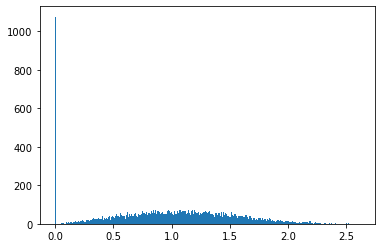

In [32]:

plt.hist(data,bins=300)
plt.show()

In [33]:
#for i in range(len(sum_list)):
#    sum_list[i]=np.round(sum_list[i]);
print(mi, ma)
print("NN welfare:           ",sum(sum_list)/len(sum_list))

[0.] [2.6099]
NN welfare:            [0.98]


In [34]:
print("cost-sharing delay  : ",total_delay_cost/test_number_cost);
print("cost-sharing welfare: ",total_welfare/test_number_cost);

cost-sharing delay  :  1.4373
cost-sharing welfare:  1.3339727508083785


In [35]:
print("dp:           ",dp[nn][0][divide_number]);

dp:            1.6237620407294613


In [36]:
print(sum(list_payment)/len(list_payment))

[0.8927]


#### 

##### 